# 1. Introduction

The purpose of this unsupervised clustering analysis is to identify the high-level simularities of the selected US states, EU countries and China simply on the milk price data trends.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px


# 2. Import and Processing Data

In [39]:
EU_Milk = pd.read_pickle('data/eu.pickle')
US_Milk = pd.read_pickle('data/us.pickle')
China_Milk = pd.read_pickle('data/cn.pickle')
All_Milk = EU_Milk.join(US_Milk).join(China_Milk).dropna()  # to ensure all regions have the same period of data

In [40]:
# because differnt regions use different scale of weight and currency, we need to standardize the data for a fair comparison before fitting into clusters.
All_Milk_Norm = pd.DataFrame(StandardScaler().fit_transform(All_Milk), index=All_Milk.index, columns=All_Milk.columns)

# 3. Determine the Number of Clusters
We use the most common elbow method to determine the optimal number of clusters

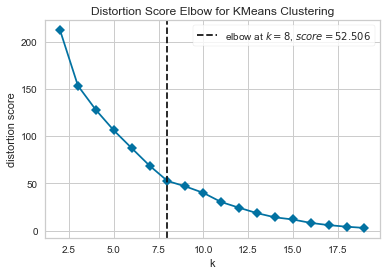

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings=False)
visualizer.fit(All_Milk_Norm.T)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# 4. Fitting the K-Means Model

In [42]:
# number of clusters determined is 8
kmeans = KMeans(n_clusters=8)

# Please note the milk prices from different regions are now targets to be clustered, therefore we need to fit the model to the transpose instead.
milk_labels = kmeans.fit_predict(All_Milk_Norm.T)

# PCA transform is just for the sake of visualization, not for model fitting purpose
pca = PCA(n_components=3)
milk_pca = pca.fit_transform(All_Milk_Norm.T)

milk_cluster = pd.DataFrame(np.column_stack((milk_pca, milk_labels)), index=All_Milk_Norm.columns, columns=['x','y','z','Group'])
milk_cluster.sort_values(by='Group')

,x,y,z,Group
Washington,-3.243185,-0.910325,0.458153,0.0
New Mexico,-4.374469,-0.616369,-0.684334,0.0
Pennsylvania,-3.885061,-0.805679,1.233654,0.0
Michigan,-3.768234,-0.436458,1.299385,0.0
New York,-4.019091,-0.641130,1.325190,0.0
Texas,-4.016517,-0.775705,-0.937419,0.0
US Total,-3.611945,-0.087979,-0.309813,0.0
Germany,4.245222,-1.230540,-0.233400,1.0
Netherlands,4.009497,-2.024529,0.453906,1.0
Denmark,3.270587,-1.457163,0.603239,1.0


# 5. Visualizing the Clusters

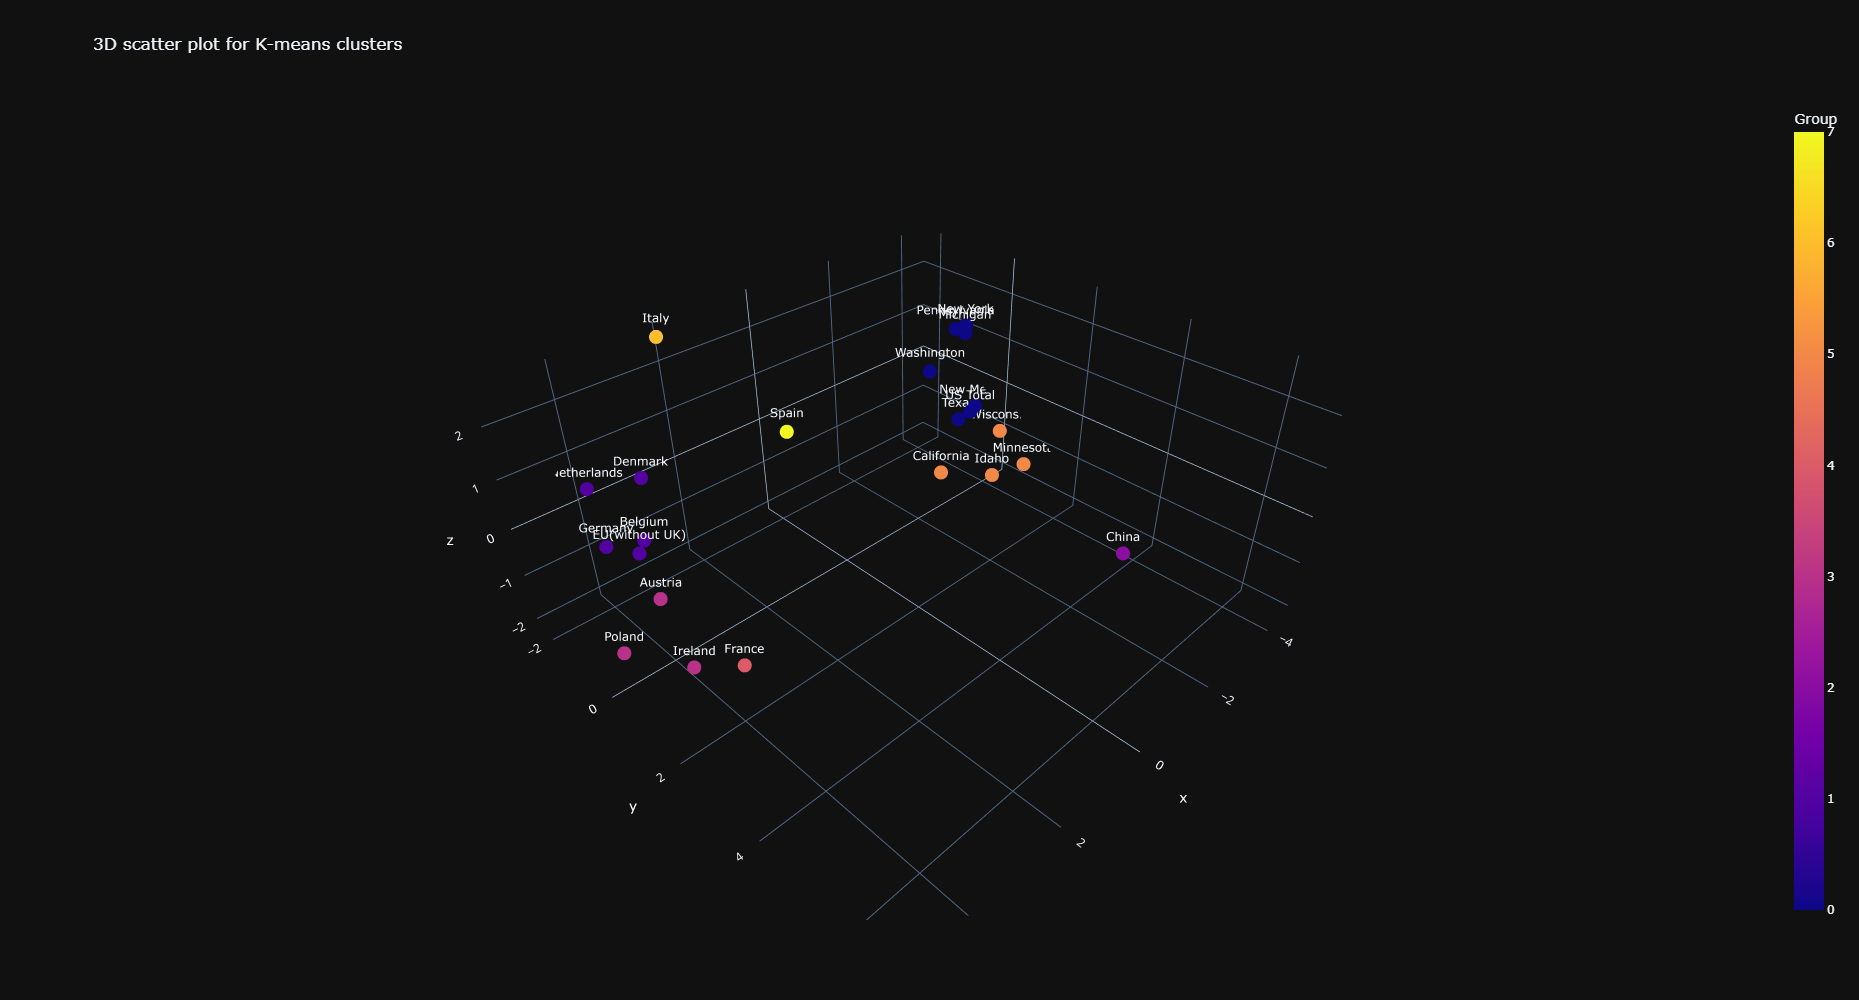

In [43]:
fig = px.scatter_3d(milk_cluster, x='x', y='y', z='z', color='Group', text=milk_cluster.index, title='3D Scatter Plot for Milk Price K-means clusters', template='plotly_dark')
fig.update_layout(width = 1200, height = 1000)
fig.show()

# 6. Observations and Insights
1. China is far isolated as expected
1. While most of the states in US and EU countries are staying together (group 0 and 1), other countries like France, Italy and Spain are also isolated
1. This cluster analysis will serve as a higher level EDA for us to understand the natural similarities of different regions.  We should make reference on later more in-depth analysis for this research and see if there's any correlations here.